# Ranks stats QA

In [24]:
# import shap
# import numpy as np
import pickle
# import glob
# import pathlib
# import subprocess
import matplotlib.pyplot as plt
import rasterio
# from rasterio.transform import Affine
# from osgeo import gdal
import pandas as pd

In [3]:
#0 -  ALL - 100 - 447 - 5737 - DivBy10K - ['NIRv', 'LAI', 'fPAR', 'MCTI', '1910.6757', '1880.6244', '1374.7622', '1900.6586', '1895.65', '1885.633'] 
# - [ 15   7   6   8 326 320 219 324 323 321] - randit
topTenIndices = [ 15,   7,   6,   8, 326, 320, 219, 324, 323, 321] 
print(len(topTenIndices),topTenIndices)

10 [15, 7, 6, 8, 326, 320, 219, 324, 323, 321]


In [4]:
bandListFile = '/explore/nobackup/projects/ilab/data/AGB/test/mcruns/input/random_sets/randint_sets_20240211_collection-ALL_max_occurrences-100_batch_size-10_num_samples-5737_bandLen-447.pkl'
setFile = open(bandListFile, "rb")
random_sets_r = pickle.load(setFile)
setFile.flush()
setFile.close()
print('initial # of subsets in input file:', len(random_sets_r))
#print(random_sets_r)

initial # of subsets in input file: 5737


In [5]:
# Create the pandas DataFrame
df = pd.DataFrame(random_sets_r)
df

,0,1,2,3,4,5,6,7,8,9
0,72,440,410,178,219,214,367,153,140,247
1,214,36,162,302,299,380,250,222,122,3
2,218,391,346,304,270,311,75,199,22,51
3,35,109,237,124,161,19,253,323,369,327
4,305,333,381,379,240,85,183,382,68,437
...,...,...,...,...,...,...,...,...,...,...
5732,266,291,358,320,173,130,203,359,187,84
5733,279,179,390,259,253,426,203,327,278,379
5734,322,2,335,235,200,113,67,298,404,415
5735,61,180,174,231,408,112,261,48,259,225


In [6]:
dfSort = df.sort_values([0,1])
dfSort

,0,1,2,3,4,5,6,7,8,9
3516,1,108,120,164,212,313,84,153,25,253
4792,1,119,143,280,170,119,304,201,407,353
4274,1,137,50,190,176,123,202,281,9,319
4605,1,16,234,381,273,256,155,386,389,286
1830,1,161,108,367,205,163,10,38,79,29
...,...,...,...,...,...,...,...,...,...,...
3657,99,396,296,352,248,109,309,304,402,377
2837,99,397,293,154,178,273,93,15,409,118
1937,99,428,211,25,63,41,123,338,278,392
1269,99,435,299,126,364,236,41,297,214,171


In [7]:
df[(df == str(15)).any(axis=1)]

,0,1,2,3,4,5,6,7,8,9
6,15,24,206,5,367,130,142,81,138,81
24,35,35,327,262,318,249,27,15,131,199
123,90,177,133,15,346,421,226,269,62,209
161,1,251,381,396,357,202,105,398,15,266
193,341,329,108,230,347,414,372,166,252,15
...,...,...,...,...,...,...,...,...,...,...
5549,432,145,114,253,43,59,148,319,260,15
5616,390,107,175,358,85,319,362,327,441,15
5632,299,406,320,28,368,15,291,407,206,402
5685,262,117,351,142,248,26,313,171,15,351


In [8]:
topTenOccurrences = []
for topTenIndex in range(0, len(topTenIndices)):
    topTenMatch = df[(df == str(topTenIndices[topTenIndex])).any(axis=1)]
    print('\ntopTenIndices[' + str(topTenIndex) + ']=',str(topTenIndices[topTenIndex]), '\n', topTenMatch)
    topTenOccurrences.append(topTenMatch)


topTenIndices[0]= 15 
         0    1    2    3    4    5    6    7    8    9
6      15   24  206    5  367  130  142   81  138   81
24     35   35  327  262  318  249   27   15  131  199
123    90  177  133   15  346  421  226  269   62  209
161     1  251  381  396  357  202  105  398   15  266
193   341  329  108  230  347  414  372  166  252   15
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
5549  432  145  114  253   43   59  148  319  260   15
5616  390  107  175  358   85  319  362  327  441   15
5632  299  406  320   28  368   15  291  407  206  402
5685  262  117  351  142  248   26  313  171   15  351
5688  140   53  356  335  266   15   75  343   93  142

[133 rows x 10 columns]

topTenIndices[1]= 7 
         0    1    2    3    4    5    6    7    8    9
11      1  241    5    7   29  230  274  324  252    7
132     7  269  330  142  369  184  447  278  149  397
154    65   23  423  432   74  230  343  133   30    7
170   399    7   89  202  152  410  131  292   3

In [9]:
topTenOccurrences[0],topTenIndices[0]

(        0    1    2    3    4    5    6    7    8    9
 6      15   24  206    5  367  130  142   81  138   81
 24     35   35  327  262  318  249   27   15  131  199
 123    90  177  133   15  346  421  226  269   62  209
 161     1  251  381  396  357  202  105  398   15  266
 193   341  329  108  230  347  414  372  166  252   15
 ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
 5549  432  145  114  253   43   59  148  319  260   15
 5616  390  107  175  358   85  319  362  327  441   15
 5632  299  406  320   28  368   15  291  407  206  402
 5685  262  117  351  142  248   26  313  171   15  351
 5688  140   53  356  335  266   15   75  343   93  142
 
 [133 rows x 10 columns],
 15)

In [10]:
dfTopTenOccurrences0 = pd.DataFrame(topTenOccurrences[0])
# The scope of these changes
# are local with systems to with statement.
with pd.option_context('display.max_rows', None,):
    print(dfTopTenOccurrences0)

        0    1    2    3    4    5    6    7    8    9
6      15   24  206    5  367  130  142   81  138   81
24     35   35  327  262  318  249   27   15  131  199
123    90  177  133   15  346  421  226  269   62  209
161     1  251  381  396  357  202  105  398   15  266
193   341  329  108  230  347  414  372  166  252   15
221   424   15  389   24  171  111   60  385   90  129
233    15  246   74  407  375   95  115  229    7  209
235   344   15  108  398   38  269  192  333  313   47
275    74  104  313   15    7  418   18  150   83  252
410    15  384  111  114  318  235   30  212  380  159
444   349  249  378  134   40  262  278  421   65   15
540   265  102  313  322   15  159  382  263  173  432
542    15  206  135  204  410  324  270  228  126  390
664   114  412  289  226  239  201  174  142  398   15
673    37  285  370  336  123  258   15  413  138   71
744   314  223  175   15  172  203  128   55  331   32
777   158   15  224   20  322  276  191  195  447   31
807   447 

In [11]:
#bins=[-3.0, -2.0, -1.0, 0, 1.0, 2.0, 3.0]
#      "bins": [-0.5, -0.1, 0.1, 0.5]
bins=[-0.5, -0.1, 0.1, 0.5]

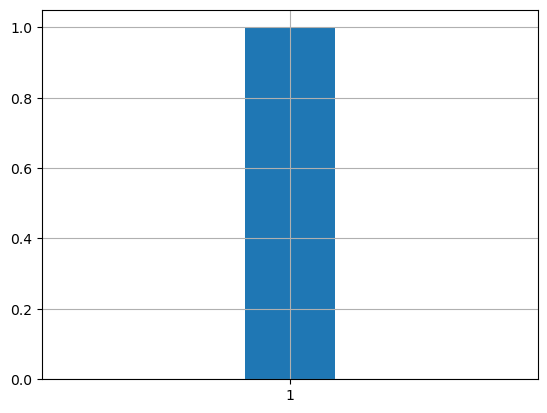

In [12]:
dfTopTenOccurrences0 = pd.DataFrame(topTenOccurrences[1])
dfTopTenOccurrences0.iloc[0].hist(bins=bins);

In [13]:
# Loop through raster bands
file = "/explore/nobackup/projects/ilab/data/AGB/test/mcruns/input/bands/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0-hyperspectral-aggregate.separate-background-scaled.tif"
raster = rasterio.open(file)

In [14]:
topTenIndices

[15, 7, 6, 8, 326, 320, 219, 324, 323, 321]

In [15]:
topTenBands= []
for band_no in range(0, len(topTenIndices)):
    # Read band
    raster_band = raster.read(topTenIndices[band_no])

#    scaled_raster_band = np.divide(raster_band, 10000)

    # Append padded raster band to list
    topTenBands.append(raster_band)
    print('Band #: ', topTenIndices[band_no], '\n', topTenBands)

Band #:  15 
 [array([[ 0.03247589,  0.07427466,  0.07417903, ..., -0.08690909,
        -0.07308858,  0.        ],
       [ 0.0230132 ,  0.0577247 ,  0.07009207, ..., -0.12192192,
        -0.0703961 ,  0.        ],
       [ 0.00123191,  0.02629849,  0.0439497 , ..., -0.09704852,
        -0.06137184,  0.        ],
       ...,
       [ 0.03623104,  0.02995271,  0.01863181, ..., -0.00703518,
         0.01374013,  0.        ],
       [ 0.03299252,  0.02294646,  0.02516692, ...,  0.0036444 ,
         0.01610825,  0.        ],
       [ 0.03061225,  0.01632325,  0.01640226, ..., -0.00034157,
        -0.01504891,  0.        ]], dtype=float32)]
Band #:  7 
 [array([[ 0.03247589,  0.07427466,  0.07417903, ..., -0.08690909,
        -0.07308858,  0.        ],
       [ 0.0230132 ,  0.0577247 ,  0.07009207, ..., -0.12192192,
        -0.0703961 ,  0.        ],
       [ 0.00123191,  0.02629849,  0.0439497 , ..., -0.09704852,
        -0.06137184,  0.        ],
       ...,
       [ 0.03623104,  0.029952

In [17]:
print('Band #: ', topTenIndices[0], '\n', topTenBands)

Band #:  15 
 [array([[ 0.03247589,  0.07427466,  0.07417903, ..., -0.08690909,
        -0.07308858,  0.        ],
       [ 0.0230132 ,  0.0577247 ,  0.07009207, ..., -0.12192192,
        -0.0703961 ,  0.        ],
       [ 0.00123191,  0.02629849,  0.0439497 , ..., -0.09704852,
        -0.06137184,  0.        ],
       ...,
       [ 0.03623104,  0.02995271,  0.01863181, ..., -0.00703518,
         0.01374013,  0.        ],
       [ 0.03299252,  0.02294646,  0.02516692, ...,  0.0036444 ,
         0.01610825,  0.        ],
       [ 0.03061225,  0.01632325,  0.01640226, ..., -0.00034157,
        -0.01504891,  0.        ]], dtype=float32), array([[0.490056  , 0.440787  , 0.5031011 , ..., 0.26054344, 0.33786437,
        0.        ],
       [0.5006623 , 0.5289866 , 0.5513352 , ..., 0.23229268, 0.3178742 ,
        0.        ],
       [0.4643252 , 0.47647914, 0.64252037, ..., 0.21454848, 0.3044751 ,
        0.        ],
       ...,
       [0.63784546, 0.6781949 , 0.54509777, ..., 0.5880749 , 0

In [18]:
dfTopTen0 = pd.DataFrame(topTenBands[0])
dfTopTen0

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0.032476,0.074275,0.074179,0.062558,0.053693,0.051528,0.053011,0.063019,0.055083,0.079988,...,-0.069750,-0.067146,-0.067920,-0.071415,-0.071538,-0.100689,-0.117341,-0.086909,-0.073089,0.0
1,0.023013,0.057725,0.070092,0.065212,0.057374,0.053885,0.049914,0.051669,0.034767,0.070711,...,-0.065707,-0.080595,-0.085106,-0.092905,-0.099407,-0.176241,-0.167980,-0.121922,-0.070396,0.0
2,0.001232,0.026298,0.043950,0.051251,0.056293,0.052604,0.047152,0.042888,0.042393,0.063599,...,-0.079864,-0.084672,-0.082238,-0.121067,-0.162865,-0.150257,-0.113714,-0.097049,-0.061372,0.0
3,-0.025771,0.006840,0.032961,0.041102,0.050847,0.032196,0.042860,0.010561,0.029862,0.051460,...,-0.094656,-0.111238,-0.134429,-0.120192,-0.127320,-0.094058,-0.100025,-0.097829,-0.083209,0.0
4,-0.026449,-0.013832,0.010288,0.024166,0.009428,0.011414,-0.031327,-0.008581,0.021466,0.049492,...,-0.064380,-0.063959,-0.100073,-0.040042,-0.006135,0.013514,0.010487,-0.012970,-0.072435,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.034453,0.026302,0.017620,0.017569,0.003193,0.039821,0.027475,0.023030,0.024220,0.020363,...,-0.014025,-0.009519,-0.017370,0.020736,-0.043883,0.021932,0.016475,0.019095,0.024668,0.0
996,0.034583,0.032077,0.026616,0.026449,0.019631,0.022925,0.026294,0.030554,0.017482,0.015443,...,-0.000696,0.000840,0.008388,-0.013558,-0.054813,0.008442,0.023027,-0.013020,0.030430,0.0
997,0.036231,0.029953,0.018632,0.024595,0.026493,0.029445,0.025690,0.009125,0.013557,0.017909,...,0.008239,0.004402,0.011560,0.006797,-0.032029,0.008946,0.015928,-0.007035,0.013740,0.0
998,0.032993,0.022946,0.025167,0.030105,0.034715,0.021211,0.011199,0.002895,0.007137,0.007013,...,-0.016524,0.006219,0.005130,-0.018586,-0.038369,-0.009800,0.006760,0.003644,0.016108,0.0


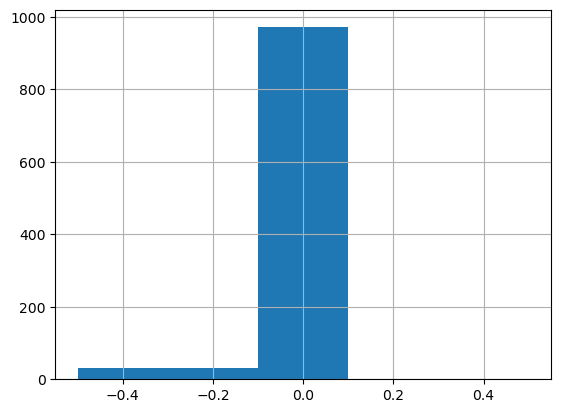

In [19]:
dfTopTen0.iloc[789].hist(bins=bins);

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


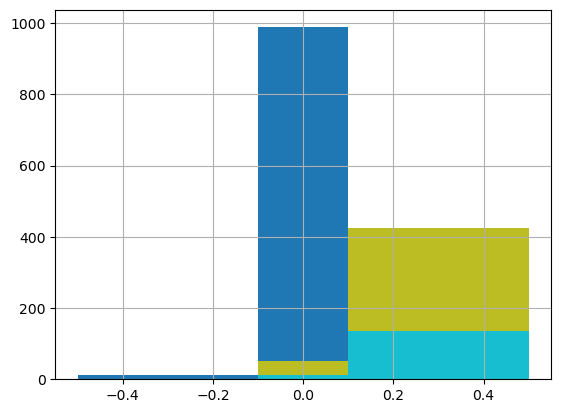

In [21]:
for index_no in range(0, len(topTenBands)):
    topTenLabel = 'Band #: ' + str(topTenIndices[index_no])
    print(pd.DataFrame(topTenBands[index_no]).iloc[0].hist(bins=bins, label=topTenLabel))

Band #: 15 Axes(0.125,0.11;0.775x0.77)
Band #: 7 Axes(0.125,0.11;0.775x0.77)
Band #: 6 Axes(0.125,0.11;0.775x0.77)
Band #: 8 Axes(0.125,0.11;0.775x0.77)
Band #: 326 Axes(0.125,0.11;0.775x0.77)
Band #: 320 Axes(0.125,0.11;0.775x0.77)
Band #: 219 Axes(0.125,0.11;0.775x0.77)
Band #: 324 Axes(0.125,0.11;0.775x0.77)
Band #: 323 Axes(0.125,0.11;0.775x0.77)
Band #: 321 Axes(0.125,0.11;0.775x0.77)


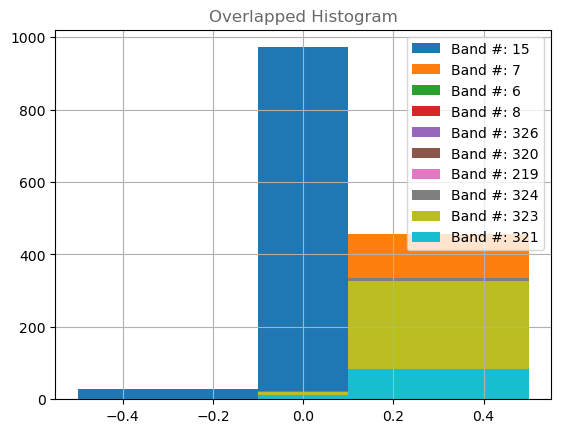

In [25]:
for index_no in range(0, len(topTenBands)):
    topTenLabel = 'Band #: ' + str(topTenIndices[index_no])
    print(topTenLabel, pd.DataFrame(topTenBands[index_no]).iloc[999].hist(bins=bins, label=topTenLabel))   
plt.legend(loc='upper right')
title_obj = plt.title('Overlapped Histogram', color='dimgrey')

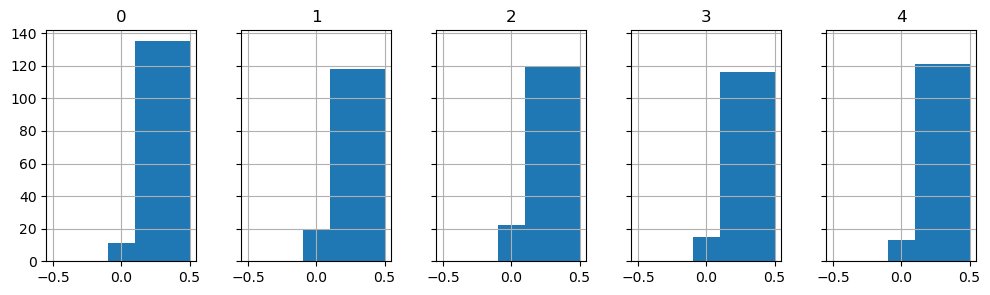

In [26]:
pd.DataFrame(topTenBands[index_no]).iloc[0:5].T.hist(bins=bins, sharey=True, layout=(1, 5), figsize=(12, 3));

In [83]:
#pd.DataFrame(topTenBands[index_no])
df = pd.DataFrame(topTenBands[0], columns=['column_1', 'column_2','column_3', 'column_4','column_5'])
#dfTopTenPlotHist = pd.DataFrame(topTenOccurrences[0], columns=['column_1', 'column_2','column_3', 'column_4','column_5','column_6','column_7', 'column_8','column_9', 'column_10'])
#num_bins = 10  # Change this number as you need
num_bins = len(bins)  # Change this number as you need

# Create separate histograms
ax = df.hist(bins=num_bins)

# Create overlapped histograms
ax = df['column_1'].hist(bins=num_bins, label='column_1')
ax = df['column_2'].hist(bins=num_bins, label='column_2')
ax = df['column_3'].hist(bins=num_bins, label='column_3')
ax = df['column_4'].hist(bins=num_bins, label='column_4')
ax = df['column_5'].hist(bins=num_bins, label='column_5')
# ax = df['column_6'].hist(bins=num_bins, label='column_6')
# ax = df['column_7'].hist(bins=num_bins, label='column_7')
# ax = df['column_8'].hist(bins=num_bins, label='column_8')
# ax = df['column_9'].hist(bins=num_bins, label='column_9')
# ax = df['column_10'].hist(bins=num_bins, label='column_10')
plt.legend(loc='upper right')
title_obj = plt.title('Overlapped Histogram', color='dimgrey')


ValueError: Shape of passed values is (1000, 1001), indices imply (1000, 5)

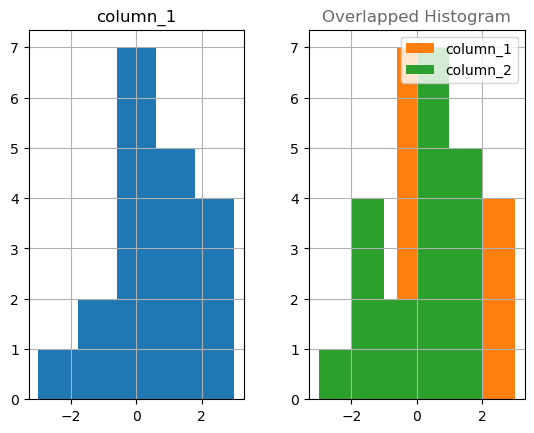

In [84]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

# Data frame creation
df = pd.DataFrame([[0, 1], [1, 1], [-1, 0], [0, -2], [2, 0], [-3, -2], [2, 0], [2, 1], [3, 0], [0, -1], [1, 1], [0, 0],
                   [1, 2], [0, 0], [1, -1], [0, -3], [-1, -2], [1, 0], [0, -2]], columns=['column_1', 'column_2'])
num_bins = 5  # Change this number as you need

# Create separate histograms
ax = df.hist(bins=num_bins)

# Create overlapped histograms
ax = df['column_1'].hist(bins=num_bins, label='column_1')
ax = df['column_2'].hist(bins=num_bins, label='column_2')
plt.legend(loc='upper right')
title_obj = plt.title('Overlapped Histogram', color='dimgrey')

In [ ]:
# Loop through raster bands
file = "/explore/nobackup/projects/ilab/data/AGB/test/mcruns/input/bands/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0-hyperspectral-aggregate.separate-background-scaled.tif"
#raster_out = '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/aggregate/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0-hyperspectral-aggregate.separate-background-scaled.tif'
raster = rasterio.open(file)

scaled_bands = []
for band_no in range(1, raster.count + 1):
    # Read band
    raster_band = raster.read(band_no)

    scaled_raster_band = np.divide(raster_band, 10000)

    # Append padded raster band to list
    scaled_bands.append(scaled_raster_band)

with rio.open(raster_out, 'w', **out_meta) as dest:
    for band_nr, src in enumerate(scaled_bands, start=1):
        dest.write(src, band_nr)

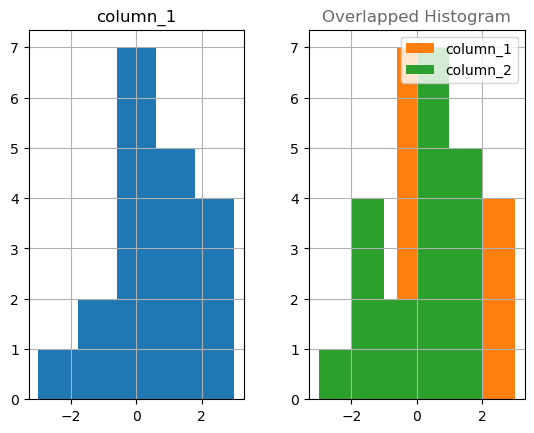

In [12]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt

# Data frame creation
df = pd.DataFrame([[0, 1], [1, 1], [-1, 0], [0, -2], [2, 0], [-3, -2], [2, 0], [2, 1], [3, 0], [0, -1], [1, 1], [0, 0],
                   [1, 2], [0, 0], [1, -1], [0, -3], [-1, -2], [1, 0], [0, -2]], columns=['column_1', 'column_2'])
num_bins = 5  # Change this number as you need

# Create separate histograms
ax = df.hist(bins=num_bins)

# Create overlapped histograms
ax = df['column_1'].hist(bins=num_bins, label='column_1')
ax = df['column_2'].hist(bins=num_bins, label='column_2')
plt.legend(loc='upper right')
title_obj = plt.title('Overlapped Histogram', color='dimgrey')


In [ ]:
for random_set in range(0, len(random_sets_r)):
    for index in range(0, len(topTenIndices)):
    
    topTenIndices
    # Read band
    raster_band = raster.read(band_no)

    scaled_raster_band = np.divide(raster_band, 10000)

    # Append padded raster band to list
    scaled_bands.append(scaled_raster_band)


In [ ]:
# Loop through raster bands
file = "/explore/nobackup/projects/ilab/data/AGB/test/beta_pmm/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0/MLBS_2018_Reflectance_reflectance_warp.tif"
raster_out = '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/aggregate/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0-hyperspectral-aggregate.separate-background-scaled.tif'
raster = rasterio.open(file)

scaled_bands = []
for band_no in range(1, raster.count + 1):
    # Read band
    raster_band = raster.read(band_no)

    scaled_raster_band = np.divide(raster_band, 10000)

    # Append padded raster band to list
    scaled_bands.append(scaled_raster_band)

with rio.open(raster_out, 'w', **out_meta) as dest:
    for band_nr, src in enumerate(scaled_bands, start=1):
        dest.write(src, band_nr)

In [ ]:
shapPrefix = '/explore/nobackup/projects/ilab/data/AGB/test/mcruns/output/exp_10_bands_10_trials'
#'\]\.model:' 
processedModelFiles = glob.glob(shapPrefix + '**/**/MODELS/*].model',
                       recursive=True)
print('# of model files already processed:', len(processedModelFiles), '\n', processedModelFiles)


In [ ]:
shapPrefix = '/explore/nobackup/projects/ilab/data/AGB/test/mcruns/output/exp_10_bands_10_trials'
processedShapFiles = glob.glob(shapPrefix + '**/**/PERMUTATION_IMPORTANCE_VALUES/*.shap_values0to50',
                       recursive=True)
print('# of shap files already processed:', len(processedShapFiles), '\n', processedShapFiles)


In [ ]:
!gdalinfo /explore/nobackup/projects/ilab/data/AGB/test/beta_pmm/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0/MLBS_2018_hyperspectral_indices.tif | grep Index > /explore/nobackup/projects/ilab/data/AGB/test/mlruns/aggregate/MLBS_2018_hyperspectral_indices-bandnames.csv
!more /explore/nobackup/projects/ilab/data/AGB/test/mlruns/aggregate/MLBS_2018_hyperspectral_indices-bandnames.csv

In [ ]:
!gdalinfo /explore/nobackup/projects/ilab/projects/AGB/MLBS-2015/2015_NEON_D07_MLBS_DP3_547000_4141000_reflectance.tif | grep Wavelength > /explore/nobackup/projects/ilab/data/AGB/test/mlruns/aggregate/2015_NEON_D07_MLBS_DP3_547000_4141000_reflectance.csv
#!more /explore/nobackup/projects/ilab/data/AGB/test/mlruns/aggregate/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0-hyperspectral-aggregate.separate-background-scaled-named.csv

In [ ]:
hyperspectral_indices = '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/aggregate/MLBS_2018_hyperspectral_indices-bandnames.csv'
neon_reflectance = '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/aggregate/2015_NEON_D07_MLBS_DP3_547000_4141000_reflectance.csv'

In [ ]:
import csv

hyperspectral_indices_bandnames = []
with open(hyperspectral_indices) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='=')
    line_count = 0
    for row in csv_reader:
#        print(row[1])
        hyperspectral_indices_bandnames.append(row[1])
print(hyperspectral_indices_bandnames)

In [ ]:
with open(neon_reflectance) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter='=')
    line_count = 0
    for row in csv_reader:
#        print(row[1])
        hyperspectral_indices_bandnames.append(row[1])
print(hyperspectral_indices_bandnames)

In [ ]:
# read csv file to a list of dictionaries
with open(hyperspectral_indices_bandnames, 'r') as file:
    csv_reader = csv.DictReader(file)
    data = [row for row in csv_reader]
print(data[1])

In [ ]:
from datetime import datetime
start_time = datetime.now()
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)
print("Your Computer Name is:" + hostname)
print("Your Computer IP Address is:" + IPAddr)

time_elapsed = datetime.now() - start_time
print('Time elapsed on node [{}] = (hh:mm:ss.ms) {}'.format(hostname, time_elapsed))

In [ ]:
file = "/explore/nobackup/projects/ilab/data/AGB/test/beta_pmm/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0/MLBS_2018_Reflectance_reflectance_warp.tif"
raster = rasterio.open(file)

plt.imshow(raster.read(1), cmap="BrBG")
plt.title("Temperature")
plt.show()
raster.close()

In [ ]:
# ds = gdal.Open(file)  

# for band in range(1, ds.RasterCount):
#     print(ds.GetRasterBand(band).GetMetadata())

In [ ]:
with rasterio.open(file) as src:
    print(src.descriptions)
    print(src.meta)
    print(src.profile)

In [ ]:
file = "/explore/nobackup/projects/ilab/data/AGB/test/beta_pmm/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0/MLBS_2018_Reflectance_reflectance_warp.tif"
raster = rasterio.open(file)

In [ ]:
raster.profile

In [ ]:
raster.profile['height']

In [ ]:
raster_band = raster.read(1)
raster_band

In [ ]:
scaled_raster_band = np.divide(raster_band, 10000)
scaled_raster_band

In [ ]:
!ls '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/exp_7bands/20240115/600584965588330414/MODELS/MLP_7bands_2_epochs::600584965588330414.keras[[2, 16]].model/variables'

In [ ]:
import sys
sys.path.append('/explore/nobackup/people/gtamkin/dev/AGB/mpf-model-factories/MultiPathFusion')
sys.path.append('/explore/nobackup/people/gtamkin/dev/AGB/monte-carlo/monte-carlo')
# from mc.model.config.MpfConfig import MpfConfig

In [ ]:
!ls -alRt /explore/nobackup/projects/ilab/data/AGB/test/mlruns/aggregate/20240112/789617681324607598/MODELS/ | grep '\]\.model:' | wc -l
!ls -alRt /explore/nobackup/projects/ilab/data/AGB/test/mlruns/aggregate/20240112/789617681324607598/MODELS/ | grep '\]\.test' | wc -l
!ls -alRt /explore/nobackup/projects/ilab/data/AGB/test/mlruns/aggregate/20240112/789617681324607598/PERMUTATION_IMPORTANCE_VALUES/ | grep shap |wc -l

In [ ]:
bandListFile = '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/random_sets/random_sets_20240111_shrink_False_num_samples_1088_bandLen_447'
random_sets_r = pickle.load(open(bandListFile, "rb"))
print(len(random_sets_r))

bandListFile = '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/aggregate/random_sets_20240111_shrink_False_num_samples_1088_bandLen_447.bak'
random_sets_orig = pickle.load(open(bandListFile, "rb"))
print(len(random_sets_orig))


In [ ]:

file1 = '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/MLP_SGD_7_layers_1024_units_MAE::642759939845152617.keras[[382, 116, 40, 358, 112, 346, 137, 76, 136, 83]].shap_values0to50'
file0 = '/_explore/nobackup/projects/ilab/data/AGB/test/mlruns/MLP_SGD_7_layers_1024_units_MAE::642759939845152617.keras[[382, 116, 40, 358, 112, 346, 137, 76, 136, 83]].shap_values0to50'
file2 = "/explore/nobackup/people/gtamkin/dev/AGB/mpf-model-factories/MultiPathFusion/multi_path_fusion/notebooks/glenn"
result = subprocess.run(["/usr/bin/ls", file1], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print('result: ', result)
print('result.returncode: ', result.returncode)
print('result.stdout: ', result.stdout)
print('result.stderr: ', result.stderr)


In [ ]:
bandListFile = '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/20240108/random_sets_20240108_shrink_False_num_samples_1196_bandLen_426'
random_sets_r = pickle.load(open(bandListFile, "rb"))

indexListIntStr = ''
print(str(random_sets_r[0]))
count = 0
for band in random_sets_r[0]: 
    if (count == 0):
        indexListIntStr = indexListIntStr + band
    else:
            indexListIntStr = indexListIntStr + ', ' + band   
    count = count + 1
print('indexListIntStr:', indexListIntStr) 

shapFile =  "'/explore/nobackup/projects/ilab/data/AGB/test/mlruns/MLP_SGD_7_layers_1024_units_MAE::642759939845152617.keras[[" + str(indexListIntStr) + "]].shap_values0to50'"

print(pathlib.Path(str(shapFile)).is_file())
print (os.path.isfile(str(shapFile)))

shapFile2 =  "/explore/nobackup/projects/ilab/data/AGB/test/mlruns/MLP_SGD_7_layers_1024_units_MAE::642759939845152617.keras[[" + str(indexListIntStr) + "]].shap_values0to50"
result = subprocess.run(["/usr/bin/ls", shapFile2], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print('\nresult: ', result)
print('result.returncode: ', result.returncode)
print('result.stdout: ', result.stdout)
print('result.stderr: ', result.stderr)

print('\n', shapFile)
!/usr/bin/ls -alt $shapFile



In [ ]:
# # pip install gdal-utils
# import osgeo_utils.gdal_merge

# img_list = ['/explore/nobackup/projects/ilab/data/AGB/test/beta_pmm/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0/MLBS_2018_hyperspectral_indices.tif', 
#             '/explore/nobackup/projects/ilab/data/AGB/test/beta_pmm/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0/MLBS_2018_Reflectance_reflectance_warp.tif']
# output_file_path = 'MLBS_2018_541567.6_4136443.0_542567.6_4137443.0-hyperspectral-aggregate-separate.tif'
# parameters = ['', '-o', output_file_path] + img_list + ['-separate', '-ot', 'Float32']
# osgeo_utils.gdal_merge.main(parameters)

In [ ]:
bandListFile = '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/20240108/random_sets_20240108_shrink_False_num_samples_1196_bandLen_426'
random_sets_r = pickle.load(open(bandListFile, "rb"))

indexListIntStr = ''
print(str(random_sets_r[0]))
count = 0
for band in random_sets_r[0]: 
    if (count == 0):
        indexListIntStr = indexListIntStr + band
    else:
        if (int(band) < 10):
            indexListIntStr = indexListIntStr + ',   ' + band
        elif (int(band) < 100):
            indexListIntStr = indexListIntStr + ', ' + band   
        else:
            indexListIntStr = indexListIntStr + ', ' + band   
    count = count + 1
print('indexListIntStr:', indexListIntStr) 

shapFile =  "'/explore/nobackup/projects/ilab/data/AGB/test/mlruns/MLP_SGD_7_layers_1024_units_MAE::642759939845152617.keras[[" + str(indexListIntStr) + "]].shap_values0to50'"
print(shapFile)
!/usr/bin/ls -alt $shapFile

shapFile2 =  "/explore/nobackup/projects/ilab/data/AGB/test/mlruns/MLP_SGD_7_layers_1024_units_MAE::642759939845152617.keras[[" + str(indexListIntStr) + "]].shap_values0to50"
result = subprocess.run(["/usr/bin/ls", shapFile2], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print('result: ', result)
print('result.returncode: ', result.returncode)
print('result.stdout: ', result.stdout)
print('result.stderr: ', result.stderr)


In [ ]:
bandListFile = '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/20240108/random_sets_20240108_shrink_False_num_samples_1196_bandLen_426'
random_sets_r = pickle.load(open(bandListFile, "rb"))
# print(shapFile)
#indexListStr = '\\[\\'
indexListStr = ''
print(str(random_sets_r[0]))
count = 0
for band in random_sets_r[0]: 
    if (count == 0):
        indexListStr = indexListStr + str(band)
    else:
        if (int(band) < 10):
            indexListStr = indexListStr + '\\,\\   ' + str(band) 
        elif (int(band) < 100):
            indexListStr = indexListStr + '\\,\\ ' + str(band)    
        else:
            indexListStr = indexListStr + '\\,\\ ' + str(band)  
    count = count + 1
print('indexListStr:', indexListStr) 

goodList = '382\,\ 116\,\ 40\,\ 358\,\ 112\,\ 346\,\ 137\,\ 76\,\ 136\,\ 83'
print('goodList    :', goodList)
if (indexListStr != goodList):
    print('No: indexListStr != goodList')
else:
    print('Yes: indexListStr == goodList')
        
    print('indexList2:', goodList)
    shapFile =  '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/MLP_SGD_7_layers_1024_units_MAE::642759939845152617.keras[[' + goodList + ']].shap_values0to50'
#    shapFile =  "/explore/nobackup/projects/ilab/data/AGB/test/mlruns/MLP_SGD_7_layers_1024_units_MAE::642759939845152617.keras[[' + goodList + ']].shap_values0to50"
    print(shapFile)
    !/usr/bin/ls -alt $shapFile

    result = subprocess.run(["/usr/bin/ls", shapFile], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print('result: ', result)
    print('result.stdout: ', result.stdout)
    print('result.stderr: ', result.stderr)
    
    print(pathlib.Path(shapFile).is_file())
    if (os.path.isfile(str(shapFile))):
        print(' found: ', shapFile)
    else:
        print(' did not find: ', shapFile)
#indexList1 = '\[\[181\,\ 302\,\ 342\,\ 333\,\ 389\,\ 300\]\]'
indexList1 = '181\,\ 302\,\ 342\,\ 333\,\ 389\,\ 300'
print('\nindexList1:', indexList1)
shapFile =  '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/MLP_SGD_7_layers_1024_units_MAE::423994812500766108.keras[[' + indexList1 + ']].shap_values0to50'
#shapFile =  '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/MLP_SGD_7_layers_1024_units_MAE::423994812500766108.keras' + indexList1 + '.shap_values0to50'
print(shapFile)
!ls -alt $shapFile


## Read batch of configuration files for experiment, which contain pointers to other run-time artifacts (e.g., SHAP files)

In [ ]:
#cfg_dir = "/explore/nobackup/projects/ilab/data/AGB/test/mlruns/exp_all21bands/01022024/random/CONFIG"
#cfg_dir = "/explore/nobackup/projects/ilab/data/AGB/test/mlruns/exp_random21bands/0102212024/CONFIG"
#cfg_dir = "/explore/nobackup/projects/ilab/data/AGB/test/mlruns/exp_full_hyperspectral/01032024/CONFIG"
#cfg_dir = "/explore/nobackup/projects/ilab/data/AGB/test/mlruns/exp_full_hyperspectral/20240105b/423994812500766108/PERMUTATION_IMPORTANCE_VALUES"
cfg_dir = "/explore/nobackup/projects/ilab/data/AGB/test/mlruns/exp_full_hyperspectral/20240105b/423994812500766108/CONFIG"
# Returns a list of names in list files. 
print("Using glob.glob()") 
cfg_files = glob.glob(cfg_dir + '**/*.cfg',  
                   recursive = True) 
for file in cfg_files: 
    print(file) 
print('num cfg files: ', len(cfg_files))  


In [ ]:
#cfg_dir = "/explore/nobackup/projects/ilab/data/AGB/test/mlruns/exp_all21bands/01022024/random/CONFIG"
#cfg_dir = "/explore/nobackup/projects/ilab/data/AGB/test/mlruns/exp_random21bands/0102212024/CONFIG"
#cfg_dir = "/explore/nobackup/projects/ilab/data/AGB/test/mlruns/exp_full_hyperspectral/01032024/CONFIG"
shap_dir = "/explore/nobackup/projects/ilab/data/AGB/test/mlruns/exp_full_hyperspectral/20240105b/423994812500766108/PERMUTATION_IMPORTANCE_VALUES"
# Returns a list of names in list files. 
print("Using glob.glob()") 
shap_files = glob.glob(shap_dir + '**/*.shap_values0to50',  
                   recursive = True) 
# for file in cfg_files: 
#     print(file) 
print('shap_files[0]: ', shap_files[0], '\nnum shap files: ', len(shap_files))  


In [ ]:
Bands = !/panfs/ccds02/app/modules/anaconda/platform/x86_64/rhel/8.6/3-2022.05/envs/ilab-tensorflow/bin/gdalinfo /explore/nobackup/projects/ilab/data/AGB/test/beta_pmm/MLBS_2018_541567.6_4136443.0_542567.6_4137443.0/MLBS_2018_Reflectance_reflectance_warp.tif | grep Band | wc -l
print('Bands: ', Bands)

In [ ]:
# set to max number of hyperspectral indices in experiment
#bandLen = 21
bandLen = int(Bands[0])
print(bandLen)
bandOccurenceArr = np.zeros(bandLen).astype(int)
print('bandOccurenceArr: \n', bandOccurenceArr)
bandAbsSumArr = np.zeros(bandLen)
bandMaxArr = np.zeros(bandLen)
bandMinArr = np.zeros(bandLen)
bandAvgArr = np.zeros(bandLen)

indexArray = np.zeros(bandLen).astype(int)
for i in range(bandLen):
    indexArray[i] = indexArray[i] + i
print('indexArray: \n', indexArray, len(indexArray))


## Load SHAP values for each batch in experiment.  
### Aggregate results and rank features 

In [ ]:
import re
s = text = shap_vals_path = '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/exp_full_hyperspectral/20240105b/423994812500766108/PERMUTATION_IMPORTANCE_VALUES/MLP_SGD_7_layers_1024_units_MAE::423994812500766108.keras[[181, 302, 342, 333, 389, 300]].shap_values0to50'
shap_values0to50 = pickle.load(open(shap_vals_path, "rb"))

num_bands = len(shap_values0to50[0][0])
print('num_bands :', num_bands)

print('len(shap_values0to50[0][0][0] (', len(shap_values0to50),',', len(shap_values0to50[0]),',', len(shap_values0to50[0][0]),')')

# Transpose test data for shap_values generation
import pandas as pd
df = pd.DataFrame(data=shap_values0to50[0])
#print(df[:12])

shap_values0to50_abs = np.abs(shap_values0to50[0])
df = pd.DataFrame(data=shap_values0to50_abs)
#print(df[:12])

for k in range(0, num_bands):
    print('column[',k,']',df[k].sum())

#print(df[0:3], df[0:3].sum())
#print(df[:], df[:].sum())

df = pd.DataFrame(data=shap_values0to50[0][0])
#print(df[:12])

df = pd.DataFrame(data=shap_values0to50[0][0][0].flatten())
#print(df[:12])


In [ ]:
start = left = '[['
end = right = ']]'
print(text[text.index(left)+len(left):text.index(right)])

bandStr = shap_vals_path[shap_vals_path.index(left)+len(left):shap_vals_path.index(right)]
#print(bandStr)
#bandList = [bandStr]
#print(bandList)
#bandList = [int(e) if e.isdigit() else e for e in bandStr.split(',')]
bandList = [e for e in bandStr.split(',')]
print(bandList, len(bandList))

In [ ]:
def reset_stats():
    # set to max number of hyperspectral indices in experiment
    #bandLen = 21
    bandLen = int(Bands[0])
#    print(bandLen)
    bandOccurenceArr = np.zeros(bandLen).astype(int)
#    print('\ninitial bandOccurenceArr: \n', bandOccurenceArr)
    bandAbsSumArr = np.zeros(bandLen)
#    print('initial bandAbsSumArr: \n', bandOccurenceArr)
    bandMaxArr = np.zeros(bandLen)
    bandMinArr = np.zeros(bandLen)
    bandAvgArr = np.zeros(bandLen)

    indexArray = np.zeros(bandLen).astype(int)
    for i in range(bandLen):
        indexArray[i] = indexArray[i] + i
    #print('indexArray: \n', indexArray, len(indexArray))


In [ ]:
    #  Walk across bins [0,4]
    print('len(shap_values0to50[0][0][0] (', len(shap_values0to50),',', len(shap_values0to50[0]),',', len(shap_values0to50[0][0]),')')
#    shap_values_raw = shap_values0to50[_bin]
#    shap_values_abs = np.abs(shap_values0to50[_bin])
#    print('\nshap_values_abs.shape  : ', shap_values_abs.shape)
 #   print('shap_values_raw.shape  : ', shap_values_raw.shape)
    shap_values0to50_abs = np.abs(shap_values0to50[0])
    df_abs = pd.DataFrame(data=shap_values0to50_abs)
    for k in range(0, num_bands):
        print('column[',k,']', df_abs[k].sum())

    for _bin in range(0, 5):
        print('\n _bin:', _bin)
        # print('len(shap_values0to50[',_bin,'][0])', len(shap_values0to50[_bin]),' X ', len(shap_values0to50[_bin][0]))
#        shap_values_raw = shap_values0to50[_bin]
#        shap_values_abs = np.abs(shap_values0to50[_bin])
#        print('\shap_values0to50[_bin].shape  : ', shap_values0to50[_bin].shape)
#        print('shap_values_raw.shape  : ', shap_values_raw.shape)
        
        for _row in range(0, 50):
            print('\n _bin:', _bin, ' _row:', _row)
            shap_values_raw_row = shap_values0to50[_bin][_row]
            shap_values_abs_row = np.abs(shap_values0to50[_bin][_row])
            print('shap_values_raw bin [', _bin, '] x row [', _row, '] :', shap_values_raw_row)
            print('shap_values_abs bin [', _bin, '] x row [', _row, '] :', shap_values_abs_row)

            shap_values_abs_row_sum_axis0 = np.sum(shap_values_abs_row[0], axis=0)
            print('shap_values_abs_row_sum_axis0  : ', shap_values_abs_row_sum_axis0)

            for _cell in range(0, 6):
                o = 9
            
            
#             shap_values_abs_row = np.abs(shap_values0to50[_bin][_row])
#             print('shap_values_abs_row  : ', shap_values0to50[_bin][_row])

#             shap_values_abs_row_sum_axis0 = np.sum(shap_values_abs_row, axis=0)
#             print('shap_values_abs_row_sum_axis0  : ', shap_values_abs_row_sum_axis0)

#         print(shap_values_abs[_row])
#             shap_values_abs_sum_axis0 = np.sum(np.abs(shap_values0to50[_bin]), axis=0)
#             print('shap_values_abs_sum_axis0.shape  : ', shap_values_abs_sum_axis0.shape)

#             shap_values_abs_sum_argsort = np.argsort(shap_values_abs_sum_axis0)
#             print('L->H :', shap_values_abs_sum_argsort)

                
#            for _cell in range(0, 6):
                # if first column of row is negative, print debug
#                print('\n _bin:', _bin, ' _row:', _row, '_cell:', _cell)
                # if ((shap_values_raw[_row][_cell] < 0) and (_row == 0) and (_cell == 0)):
                #     debug = True
                #     print('\nshap_values_raw bin [', _bin, '] x row [', _row, '] :', shap_values_raw[_row])
                #     print('shap_values_raw bin [', _bin, '] x row [', _row, '] x cell[', _cell, ']:', shap_values_raw[_row][_cell])
                #     print('shap_values_abs bin [', _bin, '] x row [', _row, '] :', shap_values_abs[_row])
                #     print('shap_values_abs bin [', _bin, '] x row [', _row, '] x cell[', _cell, ']:', shap_values_abs[_row][_cell])
                #     debug = False
                    
#         shap_values_abs_sum_axis0 = np.sum(shap_values_abs, axis=0)
#         print('shap_values_abs_sum_axis0.shape  : ', shap_values_abs_sum_axis0.shape)

#         shap_values_abs_sum_argsort = np.argsort(shap_values_abs_sum_axis0)
#         print('L->H :', shap_values_abs_sum_argsort[0])



In [ ]:
first_time = True
index = 0
# Reload config
start = left = '[['
end = right = ']]'
reset_stats()

for shap_vals_path in shap_files:
    
    index = index+1
    num_shap_files = len(shap_files)
    bandListStr = shap_vals_path[shap_vals_path.index(left)+len(left):shap_vals_path.index(right)]
    bandList = [e for e in bandListStr.split(',')]
    
    # Reload shap values
    shap_values0to50 = pickle.load(open(shap_vals_path, "rb"))
    num_bins = len(shap_values0to50)
    num_rows = len(shap_values0to50[0])
    num_bands = num_cols = len(shap_values0to50[0][0])
    print('\nProcessing shap file: index ', index,' out of ', num_shap_files, ':', os.path.basename(shap_vals_path))
    print('num_bins (', num_bins, ') num_rows (', num_rows, ') num_bands = num_cols(', num_bands, ') bandList(', bandList)
    
    #  Walk across bins [0,4]
    for _bin in range(0, num_bins):
#        print('len(shap_values0to50[',_bin,'])', len(shap_values0to50[_bin]))
        shap_values0to50_bin_abs = np.abs(shap_values0to50[_bin])
        print('shap_values0to50_bin_abs.shape  : ', shap_values0to50_bin_abs.shape)
        
        # get sum of absolute value each column
        df_shap_values0to50_bin_abs = pd.DataFrame(data=shap_values0to50_bin_abs)

        shap_values_abs_sum_axis0 = np.sum(df_shap_values0to50_bin_abs, axis=0)
        print('shap_values_abs_sum_axis0.shape  : ', shap_values_abs_sum_axis0.shape)

        shap_values_abs_sum_argsort = np.argsort(shap_values_abs_sum_axis0)
        print('L->H:\n', shap_values_abs_sum_argsort)
        
        # print sum of absolute value each column
        for _col in range(0, num_cols):
            print('band[',bandList[_col].strip(),'] column[',_col,']', df_shap_values0to50_bin_abs[_col].sum())

        #
        break;
        #  Walk across bins [0,4]
        for i in range(0, num_bands):

             #  Walk across bins [0,4]
            for j in range(0, num_bands):
                   # get band from band list
                bandNum = int(bandList[i])

        #         print('i', str(i), '\nbandNum: ', bandNum, shap_values_abs_sum_axis0[0]
        # #              ' shap_values_abs_sum_axis0[', str(bandNum-1),'][', str(i),']', 
        # #              str(shap_values_abs_sum_axis0[bandNum-1][i]), 
        #                ' bands: ', str(bandList), ' num_bands: ', str(num_bands), ' bandNum: ', str(bandNum))

                # increment Occurence value in the cell that contains the band number
                bandOccurenceArr[bandNum-1] = bandOccurenceArr[bandNum-1] + 1

                # add the absolute value of the current shape_value to the existing value in the cell that is indexed by the band number
                # this allows us to keep a running total shap values per feature for downselection later....
        #        bandAbsSumArr[bandNum-1] = (bandAbsSumArr[bandNum-1] + shap_values_abs_sum_axis0[bandNum-1][i])
                bandAbsSumArr[bandNum-1] = (bandAbsSumArr[bandNum-1] + shap_values_abs_sum_axis0[bandNum-1][i])

                occurences_axis0 = np.sum(shap_values_abs, axis=0)

                # calculate average value of each band by dividing the absolute value by the number of occurences
                bandAvgArr[bandNum-1] = (bandAbsSumArr[bandNum-1] / bandOccurenceArr[bandNum-1])

                with np.printoptions(precision=5, suppress=True):
                    print('\nbandNum: ', bandNum)
        #            print('bandOccurenceArr: ', bandOccurenceArr)
                    print('bandAbsSumArr: ',bandAbsSumArr)
        #             print('bandAvgArr: ',bandAvgArr)

    if (index > 2):
        break;
        
#shap.summary_plot(shap_values0to50, X.iloc[0:50, :], plot_type="bar", feature_names=keyword)

In [ ]:
        # get band from band list

bandNum = int(bandList[i-1])
print(bandNum)

# print('i', str(i), ' shap_values_abs_sum_axis0[', str(bandNum-1),'][', str(i),']', str(shap_values_abs_sum_axis0[bandNum-1][i]), 
#        ' bands: ', str(cfg_obj.bandList), ' num_bands: ', str(num_bands), ' bandNum: ', str(bandNum))

# increment Occurence value in the cell that contains the band number
bandOccurenceArr[bandNum-1] = bandOccurenceArr[bandNum-1] + 1

# add the absolute value of the current shape_value to the existing value in the cell that is indexed by the band number
# this allows us to keep a running total shap values per feature for downselection later....
#        bandAbsSumArr[bandNum-1] = (bandAbsSumArr[bandNum-1] + shap_values_abs_sum_axis0[bandNum-1][i])
bandAbsSumArr[bandNum-1] = (bandAbsSumArr[bandNum-1] + shap_values_abs_sum_axis0[i][i])

occurences_axis0 = np.sum(shap_values_abs, axis=0)

# calculate average value of each band by dividing the absolute value by the number of occurences
bandAvgArr[bandNum-1] = (bandAbsSumArr[bandNum-1] / bandOccurenceArr[bandNum-1])


In [ ]:
#cfg = '/explore/nobackup/projects/ilab/data/AGB/test/mlruns/exp_all21bands/01012024/bandListFile-save/CONFIG/Exp_all21bands::725617110916401361.keras[[20, 11, 13, 15, 21, 7, 9, 17, 1, 4]].cfg'
# cfg = cfg_files[0]
# cfg_obj = pickle.load(open(cfg, "rb"))
# print(cfg_obj)
# shap_vals_path = cfg_obj.shap_path
# print('shap_vals_path:', shap_vals_path)

In [ ]:
# shap_vals_path = cfg_obj.shap_path
# shap_values0to50 = pickle.load(open(shap_vals_path, "rb"))
# print(len(shap_values0to50[0][0]), cfg_obj.bandList)

In [ ]:
first_time = True
# Reload config
for file in cfg_files:
    print('Processing file: \n', file)
    cfg_obj = pickle.load(open(file, "rb"))   
    cfg_path = cfg_obj.configFile
#    num_bands = len(cfg_obj.bandList)
    shap_vals_path = cfg_obj.shap_path
    modelPath = cfg_obj.model_path
    # archive_test_generator_id = cfg_obj.trial_path
    keyword = cfg_obj.bandList

#     # Reload test data
#     test_generator = pickle.load(open(archive_test_generator_id, "rb"))

#     # Transpose test data for shap_values generation
#     import pandas as pd
#     df = pd.DataFrame(data=test_generator.file_x_stack)
#     X = df.transpose()
#     X.iloc[:, :]

    # Reload shap values
    shap_values0to50 = pickle.load(open(shap_vals_path, "rb"))
    num_bands = len(shap_values0to50[0][0])
                    
    shap_values_abs = np.abs(shap_values0to50)

    shap_values_abs_sum_axis0 = np.sum(shap_values_abs, axis=0)

    shap_values_abs_sum_argsort = np.argsort(shap_values_abs_sum_axis0)
    
    shap_values_abs_sum_argsort_r = np.argsort(-shap_values_abs_sum_axis0)
    
    print("\n**** feature_order = np.argsort(np.sum(np.abs(shap_values), axis=0))")
    print('shap_vals_path: ', str(shap_vals_path))
    print('bands: ', str(cfg_obj.bandList))
    print('sum  : ', shap_values_abs_sum_axis0[0])
    print('L->H :', shap_values_abs_sum_argsort[0])
    print('H->L :', shap_values_abs_sum_argsort_r[0])
    
    for i in range(num_bands):

        # get band from band list
        bandNum = cfg_obj.bandList[i]
        
        # print('i', str(i), ' shap_values_abs_sum_axis0[', str(bandNum-1),'][', str(i),']', str(shap_values_abs_sum_axis0[bandNum-1][i]), 
        #       ' bands: ', str(cfg_obj.bandList), ' num_bands: ', str(num_bands), ' bandNum: ', str(bandNum))
        
        # increment Occurence value in the cell that contains the band number
        bandOccurenceArr[bandNum-1] = bandOccurenceArr[bandNum-1] + 1
    
        # add the absolute value of the current shape_value to the existing value in the cell that is indexed by the band number
        # this allows us to keep a running total shap values per feature for downselection later....
        bandAbsSumArr[bandNum-1] = (bandAbsSumArr[bandNum-1] + shap_values_abs_sum_axis0[bandNum-1][i])
    
        occurences_axis0 = np.sum(shap_values_abs, axis=0)
    
        # calculate average value of each band by dividing the absolute value by the number of occurences
        bandAvgArr[bandNum-1] = (bandAbsSumArr[bandNum-1] / bandOccurenceArr[bandNum-1])

    
    with np.printoptions(precision=5, suppress=True):
        print(indexArray)
        print(bandOccurenceArr)
        print(bandAbsSumArr)
        print(bandAvgArr)
        
#shap.summary_plot(shap_values0to50, X.iloc[0:50, :], plot_type="bar", feature_names=keyword)

# ***Derive aggregated feature order***

**================================================= RANK ==================================**

In [ ]:

print('\nDerive feature order based on average:')
avg_shap_values_abs_sum_argsort_r = np.argsort(bandAvgArr)
print('avg cumulative: \nmin()' , bandAvgArr.min(), '\nmax()', bandAvgArr.max(), '\n', bandAvgArr) 
print('avg cumulative feature order L->H :' , avg_shap_values_abs_sum_argsort_r) 

print('\nDerive feature order based on aggregate sum:')
cum_shap_values_abs_sum_argsort_r = np.argsort(bandAbsSumArr)
print('raw cumulative: \nmin()' , bandAbsSumArr.min(), '\nmax()', bandAbsSumArr.max(), '\n', bandAbsSumArr) 
print('raw cumulative feature order L->H :' , cum_shap_values_abs_sum_argsort_r) 



**================================================= RANK ==================================**

# *FYI...*

## Calculate additional SHAP values (sum, abs, sort)

In [ ]:
# from _beeswarm.py.   
#        feature_order = np.argsort(np.sum(np.abs(shap_values), axis=0))


def permutation_importance(shap_values):
#    print("\nshap_values:\n", shap_values.shape)
#    print("\nshap_values:\n", shap_values, shap_values.dtype, shap_values.shape)

    shap_values_sum_axis1 = np.sum(shap_values, axis=1)
#    print("\nshap_values_sum_axis1: np.sum(shap_values_sum, axis=1) [sum across row]\n", shap_values_sum_axis1)

    shap_values_sum_axis0 = np.sum(shap_values, axis=0)
#    print("\nshap_values_sum_axis0 : np.sum(shap_values, axis=0) [sum down column]\n", shap_values_sum_axis0)

    shap_values_sum_argsort = np.argsort(shap_values_sum_axis0)
#    print ("\nshap_values_sum_argsort: np.argsort(shap_values_sum_axis0)  [sum down column]\n", shap_values_sum_argsort)

    shap_values_abs = np.abs(shap_values)
#    print("\nshap_values_abs: (np.abs(nd_a))\n", shap_values_abs)

    shap_values_abs_sum_axis1 = np.sum(shap_values_abs, axis=1)
#    print("\nshap_values_abs_sum_axis1: np.sum(shap_values_abs, axis=1) [sum across row]\n", shap_values_abs_sum_axis1)

    shap_values_abs_sum_axis0 = np.sum(shap_values_abs, axis=0)
#    print("\nshap_values_abs_sum_axis0: np.sum(shap_values_abs, axis=0) [sum down column]\n", shap_values_abs_sum_axis0)

    shap_values_abs_sum_argsort = np.argsort(shap_values_abs_sum_axis0)
#    print("\n**** feature_order = np.argsort(np.sum(np.abs(shap_values), axis=0))")
#    print ("shap_values_abs_sum_argsort: np.argsort(shap_values_abs_sum_axis0)  [sum down column]\n *", shap_values_abs_sum_argsort)

    feature_order = shap_values_abs_sum_argsort
#    if not (shap_values_abs_sum_argsort[0] == feature_order[0]): raise AssertionError
#    print('\nfeature_order:\n', feature_order)
    
    return shap_values_sum_axis1, shap_values_sum_axis0, shap_values_sum_argsort, \
        shap_values_abs, shap_values_abs_sum_axis1, shap_values_abs_sum_axis0, shap_values_abs_sum_argsort, feature_order

In [ ]:
# example row/column statistics with test matrix that is easy to predict.  Note that argsort goes from low to high.
a = [[1, 2, 3, 4, 5, 6, -7], [1, 2, 3, 4, 5, -29, 7], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7], [-1, 2, 3, 4, 5, 6, 7]]
print(np.array(a))
permutation_importance(np.array(a))
    # return shap_values_sum_axis1, shap_values_sum_axis0, shap_values_sum_argsort, \
    #     shap_values_abs, shap_values_abs_sum_axis1, shap_values_abs_sum_axis0, shap_values_abs_sum_argsort, feature_order

In [ ]:
print(i, bandNum, bandAbsSumArr[bandNum-1], shap_values_abs_sum_axis0[bandNum-1][i])
print('sum  : ', shap_values_abs_sum_axis0[0][1])


## Interrogate configuration object (optional)

In [ ]:
# Reload config
cfg_obj = pickle.load(open(cfg_files[0], "rb"))   
print(cfg_obj)
print(cfg_obj.bandList)
#mpfConfig = (MpfConfig) cfg_obj
#print(mpfConfig)

In [ ]:
print(cfg_obj.model_config)
print(cfg_obj.model_config['model_name'])

In [ ]:
print(cfg_obj.mlflow_config)
print(cfg_obj.mlflow_config['EXPERIMENT_NAME'])

In [ ]:
print(cfg_obj.X)
print(cfg_obj.data_generator_config)
print(cfg_obj.data_generator_config['data_path'])
print(cfg_obj.model_path)

In [ ]:
cfg_path = cfg_obj.configFile
num_bands = len(cfg_obj.bandList)
shap_vals_path = cfg_obj.shap_path
modelPath = cfg_obj.model_path
archive_test_generator_id = cfg_obj.trial_path
keyword = cfg_obj.bandList

print(cfg_path)
print(modelPath)
print(archive_test_generator_id)
print(shap_vals_path)
print(cfg_obj.bandList, num_bands)

## Load test data to run additional plots (optional)

In [ ]:
# Reload test data
test_generator = pickle.load(open(archive_test_generator_id, "rb"))

# Transpose test data for shap_values generation
import pandas as pd
df = pd.DataFrame(data=test_generator.file_x_stack)
X = df.transpose()
X.iloc[:, :]
print(X.shape, X.shape[0], X.shape[1])

In [ ]:
# Reload shap values
shap_values0to50 = pickle.load(open(shap_vals_path, "rb"))

In [ ]:
# print according to most in particular bin:  0 < -1.0, 1 < -0.5, 2 < 0, 3 < 0.5, 4 < 1.0
print('bin value 0: [-1.0, -0.5]] = summary_plot(shap_values0to50[0]') 
shap.summary_plot(shap_values0to50[4], X.iloc[0:50, :], plot_type="bar", feature_names=keyword)

In [ ]:
shap.summary_plot(shap_values0to50, X, plot_type="bar", feature_names=keyword)

In [ ]:
shap_values_np = np.array(shap_values0to50)
shap_values_np[0].shape

In [ ]:
df = pd.DataFrame(data=shap_values0to50[4])
df.head(5)

In [ ]:
# example row/column statistics with test matrix that is easy to predict.  Note that argsort goes from low to high.
#print(np.array(shap_values50))
_shap_values50_sum_axis1, _shap_values50_sum_axis0, _shap_value50s_sum_argsort, \
        _shap_values50_abs, _shap_values50_abs_sum_axis1, _shap_values50_abs_sum_axis0, _shap_values50_abs_sum_argsort, _feature50_order = \
        permutation_importance(np.array(shap_values0to50[0]))

print ('shap_values0to50[0] feature_order:\n', _feature50_order.shape, '\n', _feature50_order)

_shap_values50_sum_axis1, _shap_values50_sum_axis0, _shap_value50s_sum_argsort, \
        _shap_values50_abs, _shap_values50_abs_sum_axis1, _shap_values50_abs_sum_axis0, _shap_values50_abs_sum_argsort, _feature50_order = \
        permutation_importance(np.array(shap_values0to50))

print ('\nshap_values0to50[0] feature_order:\n', _feature50_order[0].shape, '\n', _feature50_order[0], '\n',  _shap_values50_abs_sum_axis0[0])
print ('\nshap_values0to50 feature_order:\n', _feature50_order.shape, '\n', _feature50_order, '\n',  _shap_values50_abs_sum_axis0)

In [ ]:
# example row/column statistics with test matrix that is easy to predict.  Note that argsort goes from low to high.
#print(np.array(shap_values0to50))
permutation_importance(np.array(shap_values0to50))

In [ ]:
#!/usr/bin/env python3
from functools import partial
from itertools import repeat
from multiprocessing import Pool, freeze_support

def func(a, b):
    print(a+b)
    return a + b

def main():
    a_args = [1,2,3]
    second_arg = 1
    with Pool() as pool:
        L = pool.starmap(func, [(1, 1), (2, 1), (3, 1)])
        M = pool.starmap(func, zip(a_args, repeat(second_arg)))
        N = pool.map(partial(func, b=second_arg), a_args)
        assert L == M == N

if __name__=="__main__":
    freeze_support()
    main()

In [ ]:
import multiprocessing

pool = multiprocessing.Pool(processes=6)
pool.starmap(func, [(1, 1), (2, 1), (3, 1)])
pool.close()
pool.join()